# Dont run this becasue this notebook is downloaded from kaggle and doenot contain input in local device

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3652,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5262,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38510,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24541,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

## Here we have 42000 images with 785 column.These images contains a number from 0 to 9.Each row denotes a single image and label denotes the number a row is representing.Each image contains 28*28 pixels i.e. 28 pixels in row and 28 pixels in column.In each row,Only the pixels that are shaded with part of number are denoted as color gradient other are as 0.

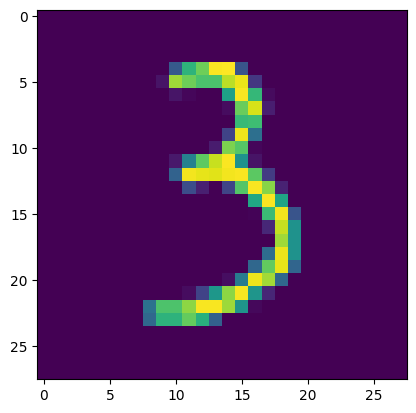

In [6]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[19002,1:].values.reshape(28,28)) 
#df.iloc[19002,1:].values will pass the numpy array with all the values in 784 columns and 784 features will be reshaped in 24 rows and 24 columns

In [7]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:] #1: vaneko 1 sahit uta sabbai column vanya tara :2 vaneko chai 2 bahek 0,1 matra vanya
Y = df.iloc[:,0]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
X_train.shape,X_test.shape

((33600, 784), (8400, 784))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [10]:
Y_pred = kn.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
c = accuracy_score(Y_test,Y_pred)
c

0.9648809523809524

## Now lets apply PCA and see the result

### Applying the mean center

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_trs = ss.fit_transform(X_train)
X_test_trs= ss.transform(X_test)

### Now instead of doing by calculating covariance and calculating eigen value and vector,lets do directly

In [13]:
from sklearn.decomposition import PCA
pc = PCA(n_components=300) # 300 is principle component we want i.e PC1,PC2.....PC300.These indicates 785 columns are to be transformed into 300D vectors.All the data points are projected into these 300 PC's
X_train_pc = pc.fit_transform(X_train)
X_test_pc = pc.transform(X_test)

### IF we have to project all the datapoints in 300 PCAs then from another method,we have to find the covariance matrix af 745*745 dimension,then we have to decompose the matrix in its eigen vector.The we have to give the maximum eigen vector as PC1,second one as PC2,third as PC3 and last as 785.Then we have to choose top 300 PC's

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train_pc,Y_train)


KNeighborsClassifier()

In [15]:
Y_pred_pc =  knn.predict(X_test_pc)

In [16]:
accuracy_score(Y_pred_pc,Y_test)

0.9664285714285714

<h2 style = "color:purple;">Here after reducing the dimension too,model is providing an accuracy more than the higher dimension one</h2>

### To find the eigen value of each 300 PCA's,we have to do

In [17]:
pc.explained_variance_

array([335506.57620544, 244807.10511442, 212051.0345165 , 185066.15331643,
       168000.24596853, 148918.34905623, 112510.83340209,  99329.48444433,
        95140.26441454,  79978.97709016,  71872.98931731,  70295.41855281,
        58642.17064567,  57797.84788158,  54416.08107528,  51094.27632925,
        45432.48090442,  44087.7557423 ,  40634.96784429,  39529.38503822,
        36946.57183798,  35169.451414  ,  33191.94921844,  31498.07839924,
        30379.28062781,  28621.64409406,  27987.85491942,  26623.31466668,
        25478.29769701,  23807.36816765,  22692.17429756,  21743.11666432,
        20713.09877465,  20215.78534799,  19292.09319353,  18537.71836944,
        17440.58129125,  16726.94208682,  16181.85994331,  15951.91565979,
        15537.57647086,  15248.0604924 ,  14302.3838214 ,  13585.34380657,
        13172.16484611,  12812.4365613 ,  12385.86119839,  11979.30992071,
        11475.73209726,  10919.83699426,  10789.15231981,  10549.79757968,
        10039.28673402,  

### To find the eigen vector of each PCA's we have to do:(Each PCA'S are 785 dimesnion that means 300 PCA contains 785 columns)

In [18]:
pc.components_

array([[-5.08742506e-18, -1.85289325e-17,  5.85242472e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.24001214e-17,  7.23566590e-17, -5.49829002e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.20489528e-17, -9.07782297e-18,  5.80314138e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-4.11336387e-17,  7.16695855e-17,  4.69013117e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.98536899e-18,  6.24205298e-17, -9.10803664e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.83033291e-19, -3.08889870e-17,  6.70214021e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [19]:
pc.components_.shape

(300, 784)

### There are 300 PCA with 784 columns

## How can we find how many components are required in PCA? To find this do this.  Ans:The component till which we can get 90% variance should be used.

In [20]:
pc.explained_variance_ratio_ 
#This will give ratio of each pc i.e for each ev from i to n = evi/(ev1+ev2+....evn)

array([0.09770722, 0.07129345, 0.06175413, 0.05389551, 0.04892553,
       0.04336844, 0.03276574, 0.02892703, 0.02770703, 0.02329171,
       0.02093107, 0.02047164, 0.01707795, 0.01683206, 0.01584721,
       0.01487983, 0.01323098, 0.01283937, 0.01183384, 0.01151186,
       0.01075969, 0.01024215, 0.00966626, 0.00917296, 0.00884714,
       0.00833528, 0.00815071, 0.00775332, 0.00741987, 0.00693325,
       0.00660848, 0.00633209, 0.00603213, 0.0058873 , 0.0056183 ,
       0.00539861, 0.0050791 , 0.00487127, 0.00471253, 0.00464556,
       0.0045249 , 0.00444059, 0.00416518, 0.00395636, 0.00383604,
       0.00373128, 0.00360705, 0.00348865, 0.003342  , 0.00318011,
       0.00314205, 0.00307234, 0.00292367, 0.00286554, 0.00279118,
       0.00269329, 0.00264929, 0.00256639, 0.00252853, 0.00245253,
       0.0024055 , 0.00239097, 0.00226894, 0.00221636, 0.00214605,
       0.00205814, 0.0020172 , 0.00196308, 0.0019362 , 0.00188242,
       0.00185615, 0.00181757, 0.00175209, 0.0017258 , 0.00165

In [21]:
pc.explained_variance_ratio_.shape

(300,)

### There are 300 eigen value for each PCA in above array.They are represented in form of ratio i.e. for ith ev = evi/(ev1+ev2....evn).Now ev1 dekhi evn samma joddei jada kati samma ma chai 0.90 or 90 % aauxa tetiota component hamilai chainxa

In [26]:
Commulative_variance = np.cumsum(pc.explained_variance_ratio_)

<img src= "PCA2.png"/>

### Here we encocounter 90% variance at the circle of blue color.So we need coomponent upto there which can be calculated as

In [29]:
np.argmax(Commulative_variance>=0.90)

86

### So we need minimum of 86 components.